# Obtención y preparación de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

https://www.kaggle.com/aungpyaeap/fish-market

In [2]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
df.shape

(159, 7)

In [5]:
# se va a clasificar según la especie, por eso se elimina esa columna 
X = df.drop("Species", axis = 1)
y = df.Species

In [6]:
y.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Separación de datos: Entrenamiento y prueba.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=100)

In [8]:
print(X_train.shape)
print(X_test.shape)

(111, 6)
(48, 6)


In [9]:
y_train.value_counts()

Perch        40
Bream        23
Roach        13
Pike         12
Parkki        9
Smelt         9
Whitefish     5
Name: Species, dtype: int64

In [10]:
y_test.value_counts()

Perch        16
Bream        12
Roach         7
Pike          5
Smelt         5
Parkki        2
Whitefish     1
Name: Species, dtype: int64

# Primer Árbol de Clasificación (max_depth = 4).
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= 4)
# profundidad se refiere a los niveles que tendrá el árbol después del nodo inicial

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [13]:
feature_labels = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
print(feature_labels)

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [14]:
class_labels = ['Perch', 'Bream', 'Roach', 'Smelt', 'Pike', 'Parkki', 'Whitefish']
print(class_labels)

['Perch', 'Bream', 'Roach', 'Smelt', 'Pike', 'Parkki', 'Whitefish']


https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz

In [15]:
from sklearn.tree import export_graphviz

In [16]:
# va a crear el código para un árbol de decisión gráfico
export_graphviz(clf, out_file = "Fish.ps", 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

### ¿Cómo transformar el código en una imagén?
Alternativa 1: https://edotor.net/
<br>Alternativa 2: http://www.webgraphviz.com/
<br>Alternativa 3: https://stamm-wilbrandt.de/GraphvizFiddle/#

<center><img src="img/Fish.png" width = "100%"></center>

# Segundo Árbol de Clasificación.

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
feature_labels = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
print(feature_labels)

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [20]:
class_labels = ['Perch', 'Bream', 'Roach', 'Smelt', 'Pike', 'Parkki', 'Whitefish']
print(class_labels)

['Perch', 'Bream', 'Roach', 'Smelt', 'Pike', 'Parkki', 'Whitefish']


In [21]:
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(clf, out_file = "FishMaxDepth.ps", 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

<center><img src="img/FishMaxDepth.png" width = "100%"></center>

In [23]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# Matriz de confusión para verificar el desempeño.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [24]:
from sklearn.metrics import confusion_matrix

### Entrenamiento.

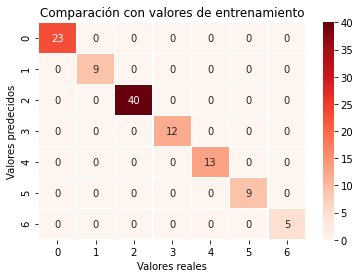

In [25]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

### Prueba.

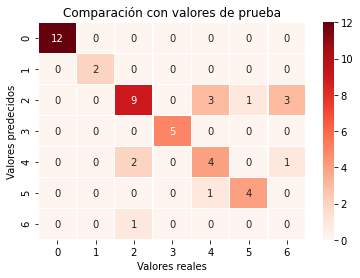

In [26]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

# Reporte de clasificación.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        23
      Parkki       1.00      1.00      1.00         9
       Perch       1.00      1.00      1.00        40
        Pike       1.00      1.00      1.00        12
       Roach       1.00      1.00      1.00        13
       Smelt       1.00      1.00      1.00         9
   Whitefish       1.00      1.00      1.00         5

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        12
      Parkki       1.00      1.00      1.00         2
       Perch       0.75      0.56      0.64        16
        Pike       1.00      1.00      1.00         5
       Roach       0.50      0.57      0.53         7
       Smelt       0.80      0.80      0.80         5
   Whitefish       0.00 